### EDA

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('D:\ƒê·ªì √°n\data\clean_data\data.csv', encoding='utf-8')

In [8]:
data.head()

farm_id  province  farm_size_ha crop_variety    crop_season  \
0  FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
1  FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
2  FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
3  FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
4  FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   

  sowing_date harvest_date        date  growth_stage  rain  ...  soil_ec  \
0  2010-08-03   2010-10-22  2010-08-03  Ngo√†i m√πa v·ª•  10.7  ...     1.08   
1  2010-08-03   2010-10-22  2010-08-04  Ngo√†i m√πa v·ª•  12.4  ...     1.08   
2  2010-08-03   2010-10-22  2010-08-05  Ngo√†i m√πa v·ª•   0.8  ...     1.08   
3  2010-08-03   2010-10-22  2010-08-06  Ngo√†i m√πa v·ª•   4.5  ...     1.08   
4  2010-08-03   2010-10-22  2010-08-07  Ngo√†i m√πa v·ª•   2.5  ...     1.08   

   water_level  soil_ph  disease_state    action    detail  \
0        3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
1        3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
2        3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
3        3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
4        3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   

   days_since_treatment  yield_ton_per_ha  total_yield_ton  total_cost_vnd  
0                     0              6.49             9.54         1249500  
1                     0              6.49             9.54         1249500  
2                     0              6.49             9.54         1249500  
3                     0              6.49             9.54         1249500  
4                     0              6.49             9.54         1249500  

[5 rows x 29 columns]

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63577 entries, 0 to 63576
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               63577 non-null  object 
 1   province              63577 non-null  object 
 2   farm_size_ha          63577 non-null  float64
 3   crop_variety          63577 non-null  object 
 4   crop_season           63577 non-null  object 
 5   sowing_date           63577 non-null  object 
 6   harvest_date          63577 non-null  object 
 7   date                  63577 non-null  object 
 8   growth_stage          63577 non-null  object 
 9   rain                  63577 non-null  float64
 10  min                   63577 non-null  int64  
 11  max                   63577 non-null  int64  
 12  humidi                63577 non-null  int64  
 13  wind                  63577 non-null  int64  
 14  cloud                 63577 non-null  int64  
 15  soil_moisture      

In [11]:
data.describe()

farm_size_ha          rain           min           max        humidi  \
count  63577.000000  63577.000000  63577.000000  63577.000000  63577.000000   
mean       1.814030      4.967296     24.589915     31.180930     75.014785   
std        0.806264      9.445485      3.192875      3.987917      8.669683   
min        0.500000      0.000000      4.000000      6.000000     30.000000   
25%        1.270000      0.100000     24.000000     30.000000     69.000000   
50%        1.630000      1.600000     25.000000     32.000000     75.000000   
75%        2.140000      6.300000     26.000000     34.000000     81.000000   
max        4.980000    466.000000     32.000000     43.000000     98.000000   

               wind         cloud  soil_moisture  soil_nitrogen  \
count  63577.000000  63577.000000   63577.000000   63577.000000   
mean      12.114900     39.017160      66.607260       0.169578   
std        4.803136     21.049737      27.590211       0.175912   
min        2.000000      0.000000      25.000000       0.050000   
25%        9.000000     23.000000      39.301000       0.050000   
50%       11.000000     36.000000      70.335000       0.050000   
75%       15.000000     52.000000      95.000000       0.303000   
max       46.000000    100.000000      95.000000       0.700000   

       soil_potassium  soil_organic      soil_ec   water_level       soil_ph  \
count    63577.000000  63577.000000  63577.00000  63577.000000  63577.000000   
mean         0.073187      2.331685      1.42123      8.207346      5.095196   
std          0.055396      0.296087      0.61525      5.548953      0.715290   
min          0.040000      1.800000      0.70500      1.000000      4.000000   
25%          0.050000      2.068000      0.97500      2.622000      4.552000   
50%          0.050000      2.348000      1.21500      7.120000      5.089000   
75%          0.050000      2.608000      1.68300     15.000000      5.604000   
max          0.337000      2.798000      3.04700     15.000000      6.754000   

       days_since_treatment  yield_ton_per_ha  total_yield_ton  total_cost_vnd  
count          63577.000000      63577.000000     63577.000000    6.357700e+04  
mean               5.455857          6.512447        11.841922    2.555272e+06  
std               14.060588          0.701390         5.520321    2.018035e+06  
min                0.000000          4.900000         3.000000    4.250000e+05  
25%                0.000000          6.000000         8.070000    1.270000e+06  
50%                0.000000          6.500000        10.480000    1.870000e+06  
75%                0.000000          6.980000        14.210000    3.149400e+06  
max              154.000000          7.990000        35.430000    1.363600e+07

In [12]:
data.describe(include=["object"])

farm_id  province crop_variety          crop_season sowing_date  \
count         63577     63577        63577                63577       63577   
unique          532        14            7                   38         256   
top     FARM_25C69F  An Giang       KC06-1  ƒê√¥ng xu√¢n 2018-2019  2019-11-02   
freq            304      8500        10354                 2158        1152   

       harvest_date        date  growth_stage disease_state    action  \
count         63577       63577         63577         63577     63577   
unique          304        4534             5             4         6   
top      2019-03-29  2018-11-18  Ngo√†i m√πa v·ª•   b√¨nh th∆∞·ªùng  kh√¥ng c√≥   
freq            719          17         47112         52036     61904   

          detail  
count      63577  
unique        24  
top     kh√¥ng c√≥  
freq       61904

In [13]:
data.isna().sum()

farm_id                 0
province                0
farm_size_ha            0
crop_variety            0
crop_season             0
sowing_date             0
harvest_date            0
date                    0
growth_stage            0
rain                    0
min                     0
max                     0
humidi                  0
wind                    0
cloud                   0
soil_moisture           0
soil_nitrogen           0
soil_potassium          0
soil_organic            0
soil_ec                 0
water_level             0
soil_ph                 0
disease_state           0
action                  0
detail                  0
days_since_treatment    0
yield_ton_per_ha        0
total_yield_ton         0
total_cost_vnd          0
dtype: int64

In [14]:
data.isna().mean() * 100

farm_id                 0.0
province                0.0
farm_size_ha            0.0
crop_variety            0.0
crop_season             0.0
sowing_date             0.0
harvest_date            0.0
date                    0.0
growth_stage            0.0
rain                    0.0
min                     0.0
max                     0.0
humidi                  0.0
wind                    0.0
cloud                   0.0
soil_moisture           0.0
soil_nitrogen           0.0
soil_potassium          0.0
soil_organic            0.0
soil_ec                 0.0
water_level             0.0
soil_ph                 0.0
disease_state           0.0
action                  0.0
detail                  0.0
days_since_treatment    0.0
yield_ton_per_ha        0.0
total_yield_ton         0.0
total_cost_vnd          0.0
dtype: float64

In [15]:
data.duplicated().sum()

np.int64(0)

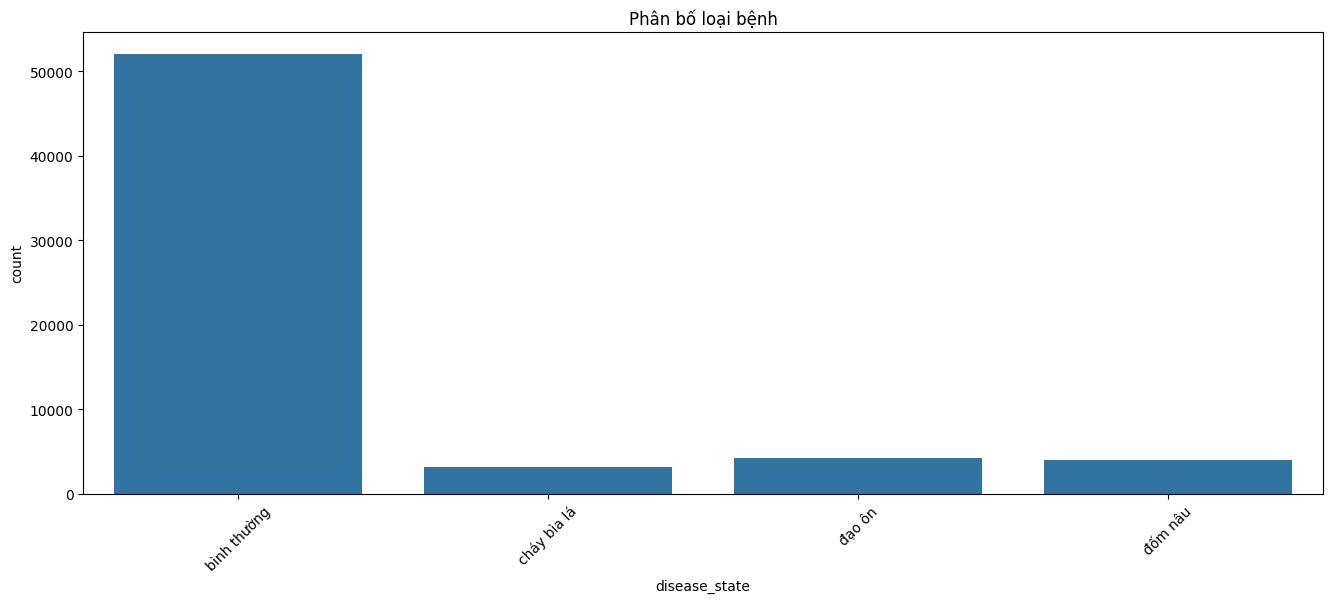

In [16]:
plt.figure(figsize=(16, 6))
sns.countplot(x="disease_state", data=data)
plt.title("Ph√¢n b·ªë lo·∫°i b·ªánh")
plt.xticks(rotation=45)
plt.show()

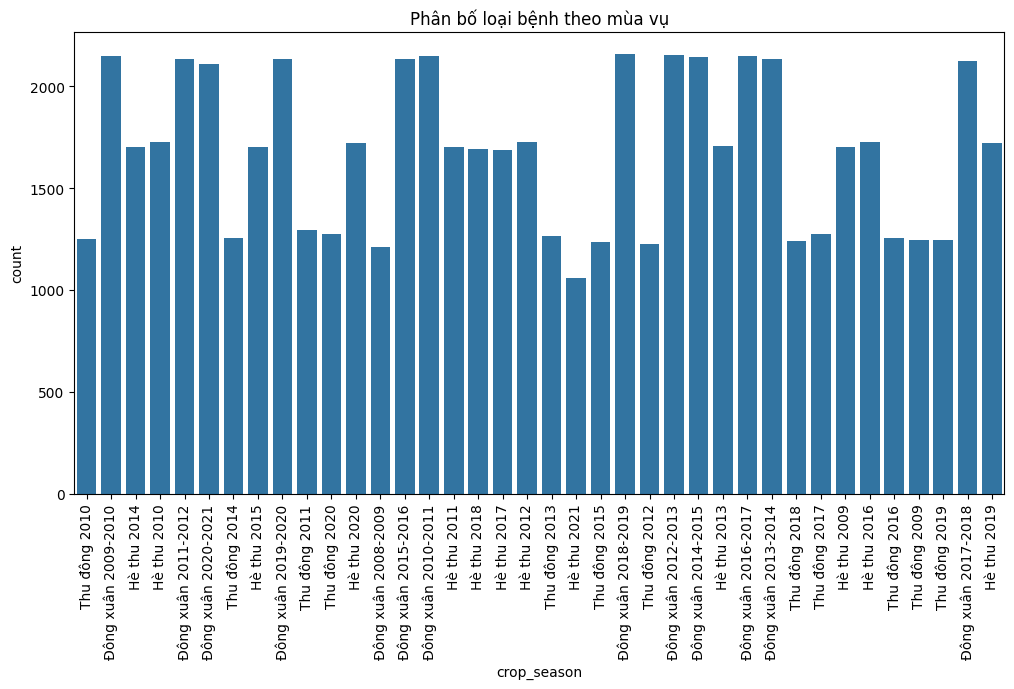

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="crop_season", data=data)
plt.title("Ph√¢n b·ªë lo·∫°i b·ªánh theo m√πa v·ª•")
plt.xticks(rotation=90)
plt.show()

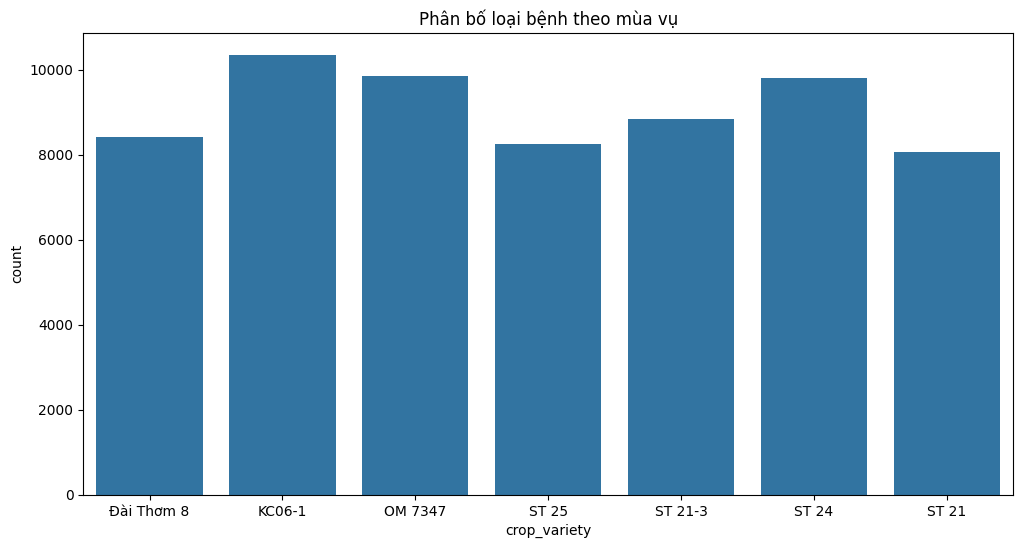

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="crop_variety", data=data)
plt.title("Ph√¢n b·ªë lo·∫°i b·ªánh theo m√πa v·ª•")
plt.xticks(rotation=0)
plt.show()

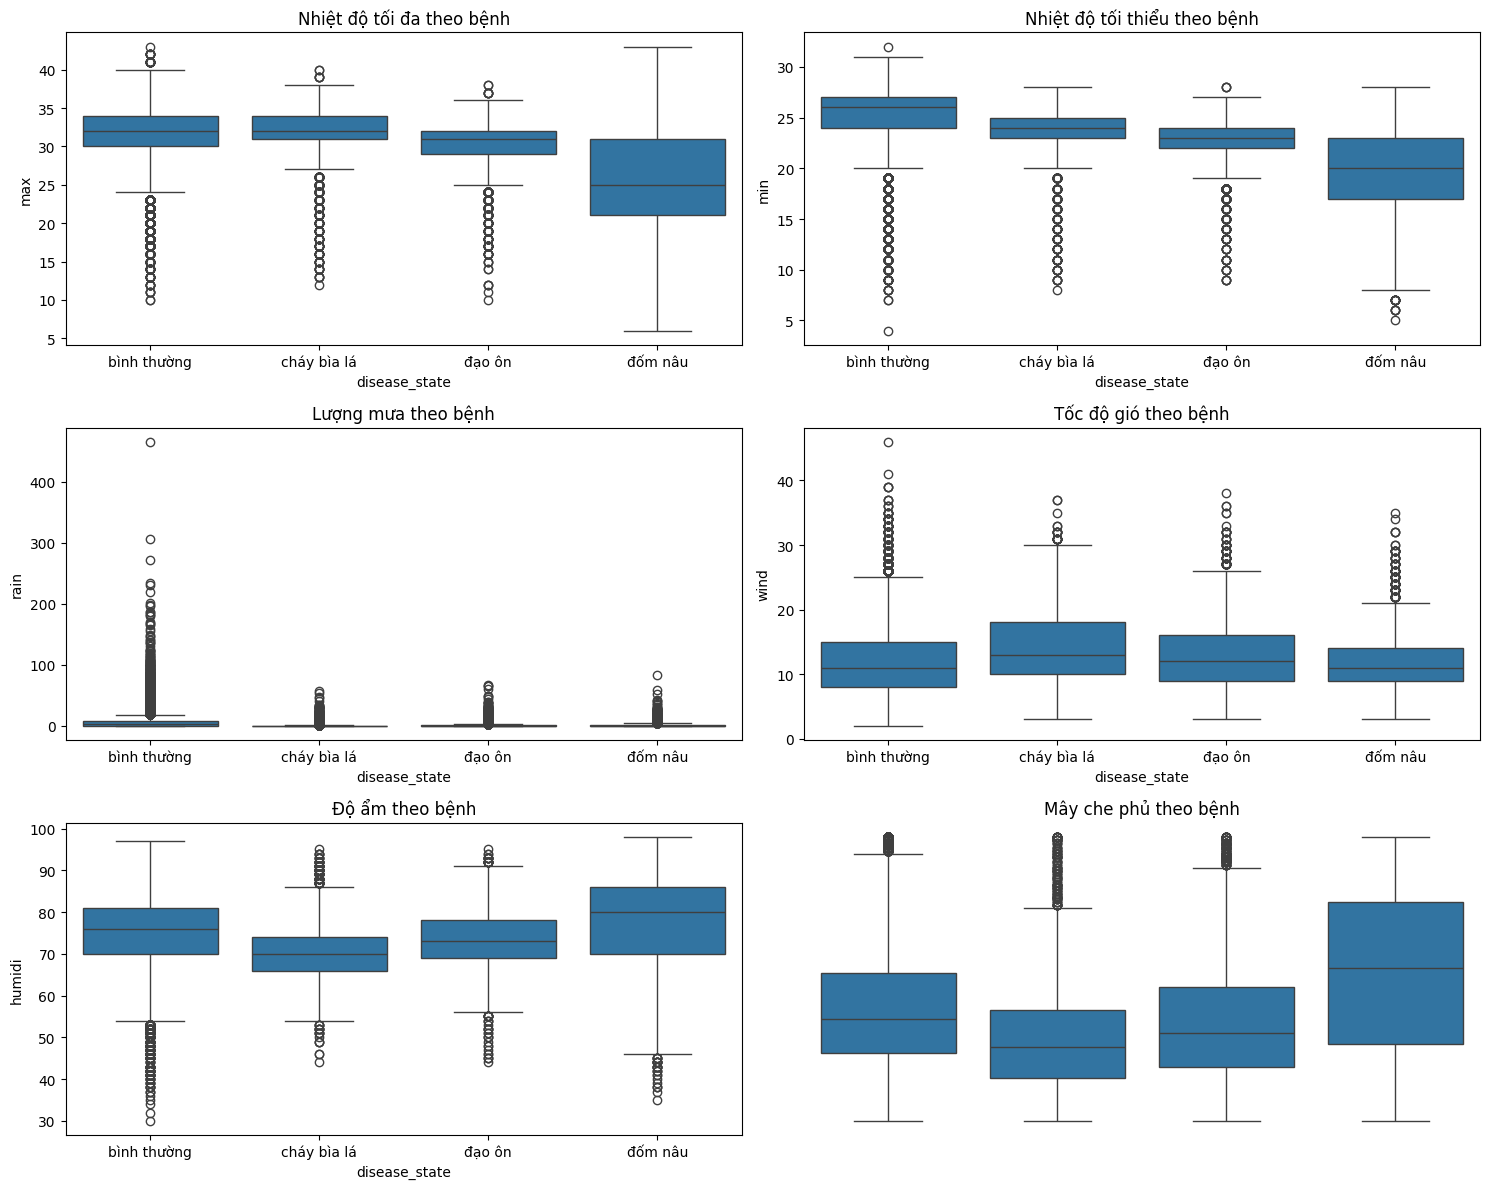

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  

variables = [
    ('max', 'Nhi·ªát ƒë·ªô t·ªëi ƒëa'),
    ('min', 'Nhi·ªát ƒë·ªô t·ªëi thi·ªÉu'),
    ('rain', 'L∆∞·ª£ng m∆∞a'),
    ('wind', 'T·ªëc ƒë·ªô gi√≥'),
    ('humidi', 'ƒê·ªô ·∫©m'),
    ('cloud', 'M√¢y che ph·ªß')
]

for idx, (var, title) in enumerate(variables):
    row = idx // 2
    col = idx % 2
    sns.boxplot(x='disease_state', y=var, data=data, ax=axes[row, col])
    axes[row, col].set_title(f"{title} theo b·ªánh")
    axes[row, col].tick_params(axis='x')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

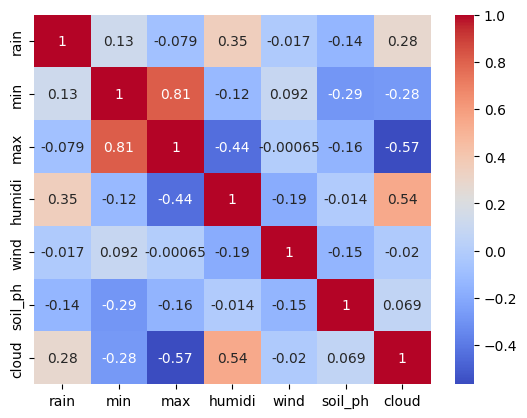

In [ ]:
corr = data[['rain','min','max','humidi','wind','soil_ph', 'cloud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

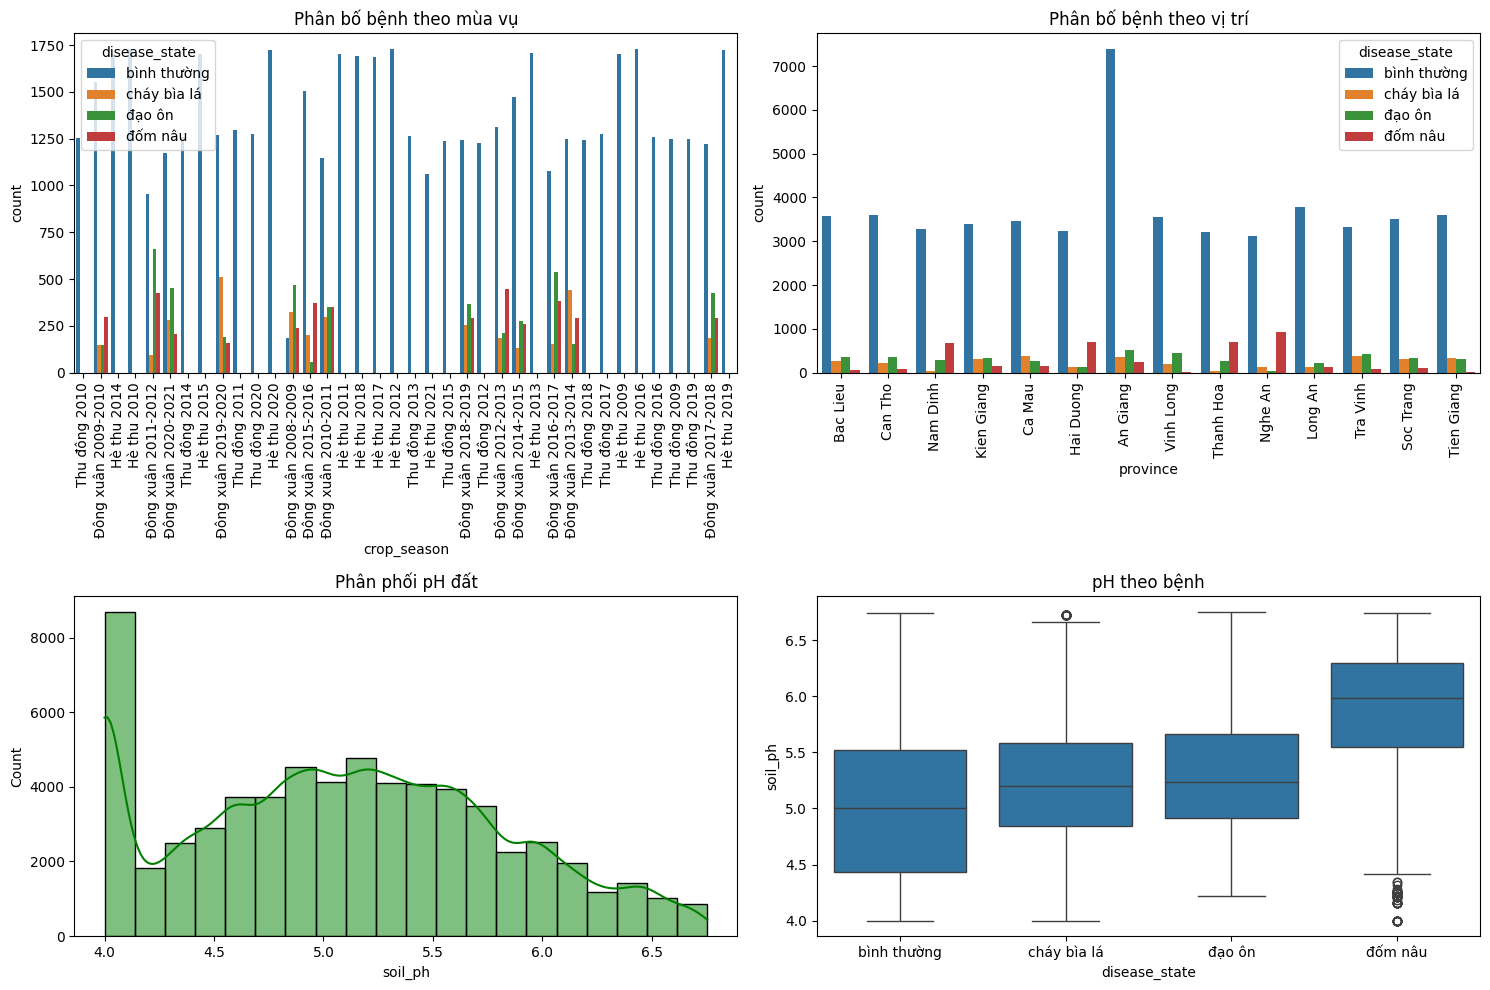

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x="crop_season", hue="disease_state", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Ph√¢n b·ªë b·ªánh theo m√πa v·ª•")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x="province", hue="disease_state", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Ph√¢n b·ªë b·ªánh theo v·ªã tr√≠")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.histplot(data['soil_ph'], kde=True, ax=axes[1, 0], bins=20, color='green')
axes[1, 0].set_title("Ph√¢n ph·ªëi pH ƒë·∫•t")

sns.boxplot(x='disease_state', y='soil_ph', data=data, ax=axes[1, 1])
axes[1, 1].set_title("pH theo b·ªánh")
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

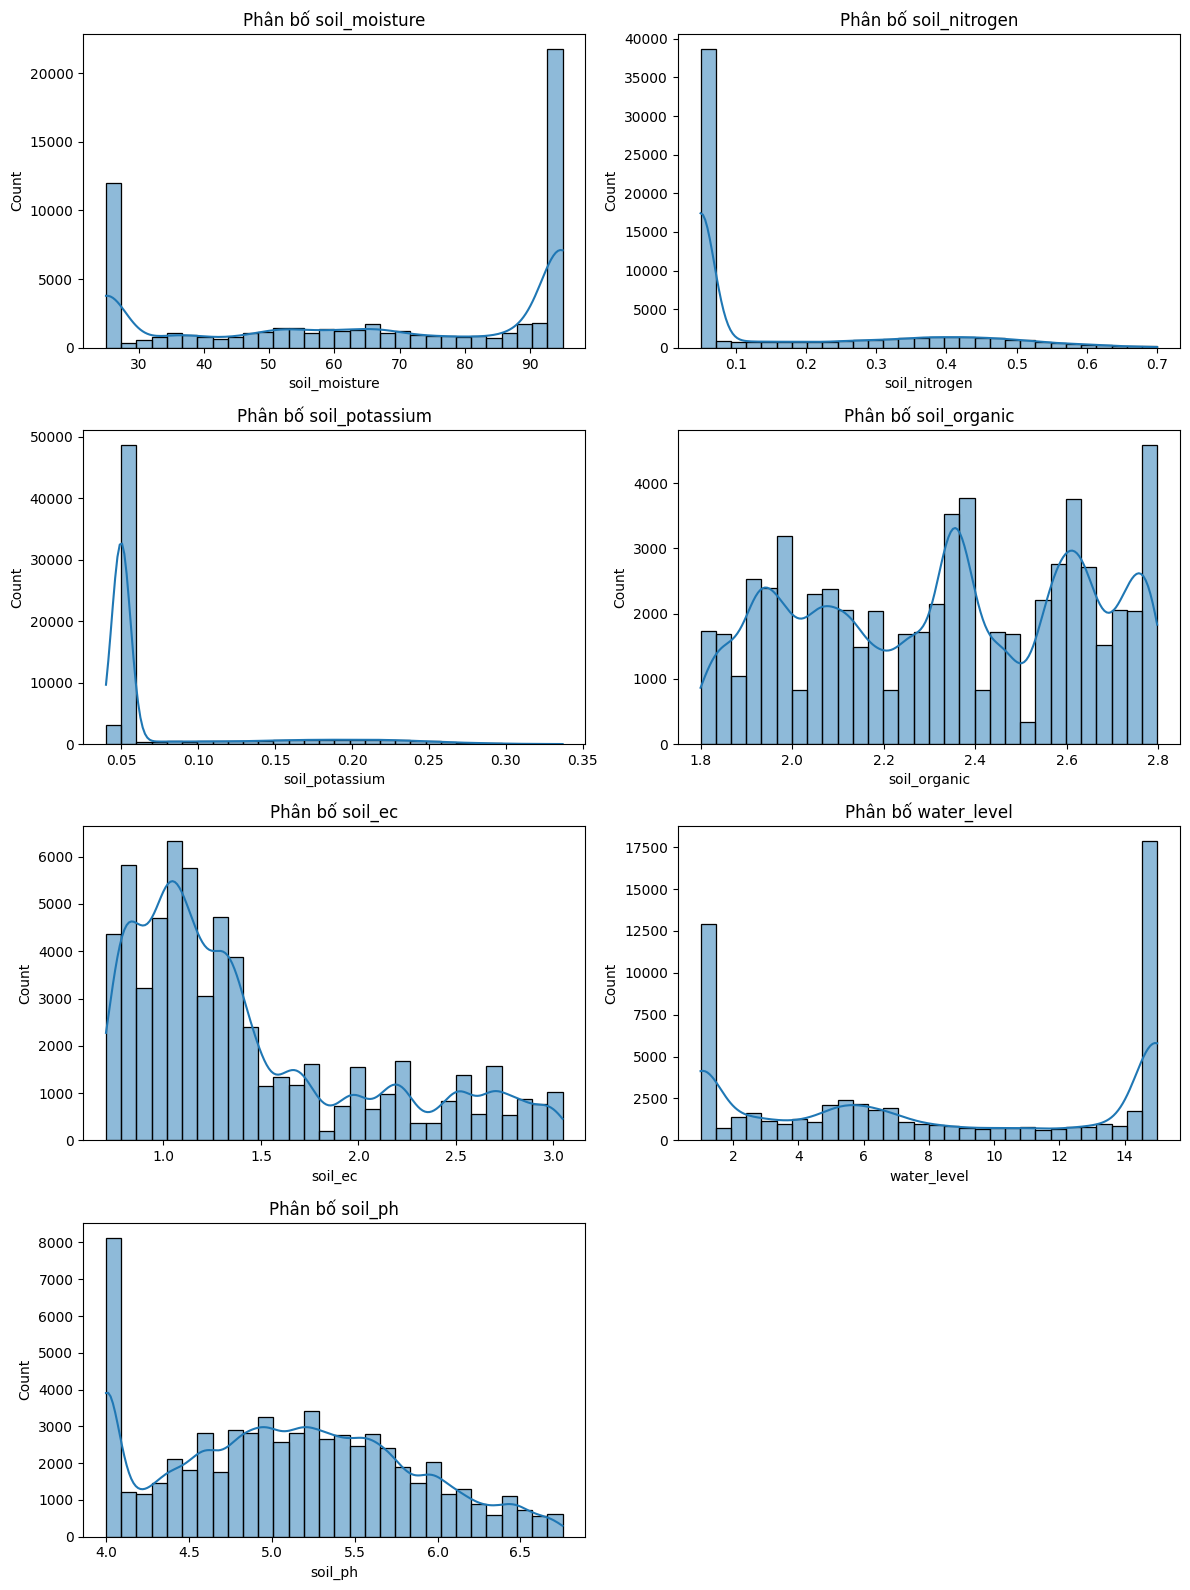

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

soil_cols = ['soil_moisture', 'soil_nitrogen', 'soil_potassium', 
             'soil_organic', 'soil_ec', 'water_level', 'soil_ph']

# T·∫°o figure v·ªõi 4 h√†ng x 2 c·ªôt
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()  # Chuy·ªÉn v·ªÅ list 1D ƒë·ªÉ duy·ªát d·ªÖ h∆°n

for i, col in enumerate(soil_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Ph√¢n b·ªë {col}")

# ·∫®n subplot th·ª´a (√¥ th·ª© 8 v√¨ ta c√≥ 7 bi·∫øn)
for j in range(len(soil_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

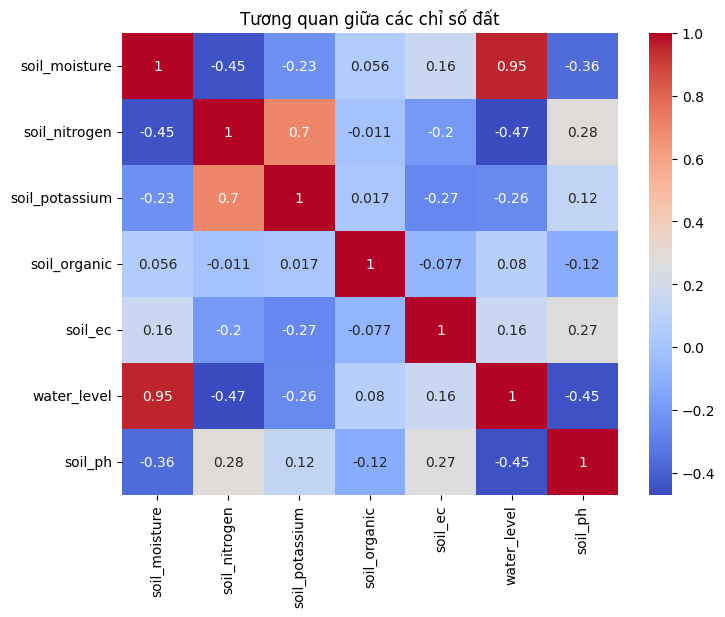

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data[soil_cols].corr(), annot=True, cmap='coolwarm')
plt.title("T∆∞∆°ng quan gi·ªØa c√°c ch·ªâ s·ªë ƒë·∫•t")
plt.show()

In [24]:
details_clean = data['detail'].dropna()

# Lo·∫°i b·ªè nh·ªØng c√¢u kh√¥ng ch·ª©a th√¥ng tin
details_clean = details_clean[
    ~details_clean.str.lower().isin(['kh√¥ng c√≥', 'kh√¥ng r√µ chi ti·∫øt', ''])
]

In [25]:
details_clean

16       Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
17       Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
96       Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
105      Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
162                              gieo s·∫° th∆∞a
                         ...                 
63244    Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
63445    Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
63446    Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
63455    Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
63456    Th·ª±c hi·ªán ƒë·ªãnh k·ª≥ theo giai ƒëo·∫°n c√¢y
Name: detail, Length: 1673, dtype: object

In [26]:
details_clean = details_clean.apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [27]:
word_counts = Counter(" ".join(details_clean).split())
print(word_counts.most_common(20))  # Top 20 t·ª´

[('c√¢y', 1217), ('ƒë·ªãnh', 1161), ('th·ª±c', 1140), ('hi·ªán', 1140), ('k·ª≥', 1140), ('theo', 1140), ('giai', 1140), ('ƒëo·∫°n', 1140), ('phun', 156), ('thu·ªëc', 124), ('b·ªánh', 109), ('ho·∫∑c', 75), ('gieo', 65), ('s·∫°', 65), ('c·∫Øt', 63), ('b·ªè', 63), ('ph√¢n', 59), ('b√≥n', 59), ('tr·ª´', 55), ('n∆∞·ªõc', 53)]


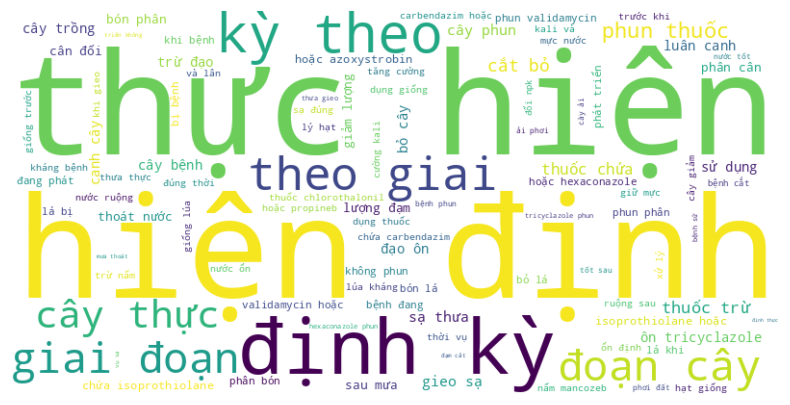

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(details_clean))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

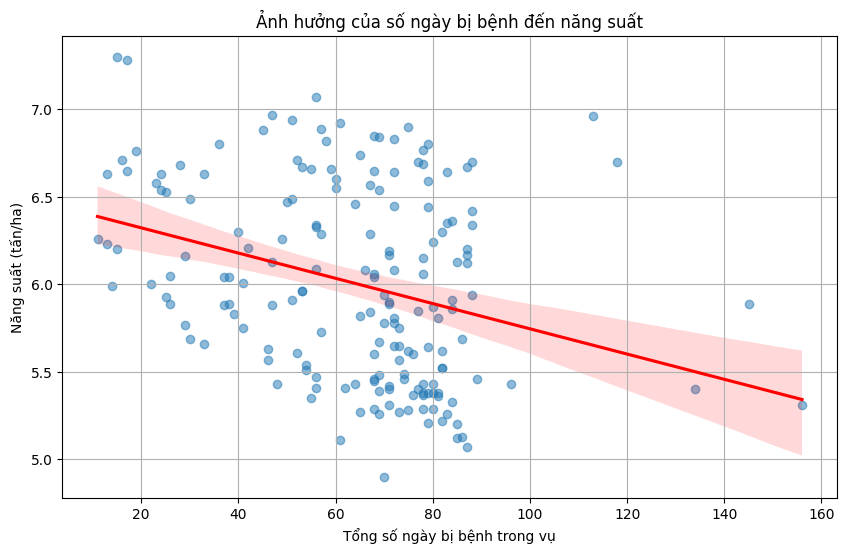

In [29]:
# ƒê·∫øm s·ªë ng√†y b·ªã b·ªánh cho m·ªói n√¥ng tr·∫°i
sick_days_per_farm = data[data['disease_state'] != 'b√¨nh th∆∞·ªùng'].groupby('farm_id').size().reset_index(name='sick_days')

# L·∫•y th√¥ng tin nƒÉng su·∫•t c·ªßa m·ªói n√¥ng tr·∫°i
yield_per_farm = data.groupby('farm_id').first()[['yield_ton_per_ha']].reset_index()

# G·ªôp l·∫°i
impact_df = pd.merge(sick_days_per_farm, yield_per_farm, on='farm_id')

# V·∫Ω bi·ªÉu ƒë·ªì scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=impact_df, x='sick_days', y='yield_ton_per_ha', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('·∫¢nh h∆∞·ªüng c·ªßa s·ªë ng√†y b·ªã b·ªánh ƒë·∫øn nƒÉng su·∫•t')
plt.xlabel('T·ªïng s·ªë ng√†y b·ªã b·ªánh trong v·ª•')
plt.ylabel('NƒÉng su·∫•t (t·∫•n/ha)')
plt.grid(True)
plt.show()

### Build model predict disease base on environment data

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib 

In [33]:
data = pd.read_csv('D:\ƒê·ªì √°n\data\clean_data\data.csv', encoding='utf-8')

In [34]:
data

farm_id  province  farm_size_ha crop_variety    crop_season  \
0      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
1      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
2      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
3      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
4      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
...            ...       ...           ...          ...            ...   
63572  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63573  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63574  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63575  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63576  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   

      sowing_date harvest_date        date  growth_stage  rain  ...  soil_ec  \
0      2010-08-03   2010-10-22  2010-08-03  Ngo√†i m√πa v·ª•  10.7  ...    1.080   
1      2010-08-03   2010-10-22  2010-08-04  Ngo√†i m√πa v·ª•  12.4  ...    1.080   
2      2010-08-03   2010-10-22  2010-08-05  Ngo√†i m√πa v·ª•   0.8  ...    1.080   
3      2010-08-03   2010-10-22  2010-08-06  Ngo√†i m√πa v·ª•   4.5  ...    1.080   
4      2010-08-03   2010-10-22  2010-08-07  Ngo√†i m√πa v·ª•   2.5  ...    1.080   
...           ...          ...         ...           ...   ...  ...      ...   
63572  2012-08-08   2012-10-24  2012-10-22  Ngo√†i m√πa v·ª•   3.1  ...    1.729   
63573  2012-08-08   2012-10-24  2012-10-23  Ngo√†i m√πa v·ª•   5.4  ...    1.729   
63574  2012-08-08   2012-10-24  2012-10-23  Ngo√†i m√πa v·ª•   3.5  ...    1.729   
63575  2012-08-08   2012-10-24  2012-10-24  Ngo√†i m√πa v·ª•   3.2  ...    1.729   
63576  2012-08-08   2012-10-24  2012-10-24  Ngo√†i m√πa v·ª•   2.2  ...    1.729   

       water_level  soil_ph  disease_state    action    detail  \
0            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
1            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
2            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
3            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
4            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
...            ...      ...            ...       ...       ...   
63572       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63573       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63574       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63575       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63576       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   

       days_since_treatment  yield_ton_per_ha  total_yield_ton  total_cost_vnd  
0                         0              6.49             9.54         1249500  
1                         0              6.49             9.54         1249500  
2                         0              6.49             9.54         1249500  
3                         0              6.49             9.54         1249500  
4                         0              6.49             9.54         1249500  
...                     ...               ...              ...             ...  
63572                     0              7.30             8.69         1011500  
63573                     0              7.30             8.69         1011500  
63574                     0              7.30             8.69         1011500  
63575                     0              7.30             8.69         1011500  
63576                     0              7.30             8.69         1011500  

[63577 rows x 29 columns]

In [36]:
features = [
    # Th·ªùi ti·∫øt
    'min', 'max', 'rain', 'wind', 'humidi',
    # ƒê·∫•t
    'soil_moisture', 'soil_nitrogen', 'soil_potassium',
    'soil_organic', 'soil_ec', 'water_level', 'soil_ph',
    # V√πng v√† m√πa v·ª•
    'crop_season', 'province'
]

In [38]:
X = data[features]
y = data['disease_state']

In [40]:
le_crop_season = LabelEncoder()
le_province = LabelEncoder()

X['crop_season'] = le_crop_season.fit_transform(data['crop_season'])
X['province'] = le_province.fit_transform(data['province'])

# L∆∞u encoder ƒë·ªÉ d√πng l·∫°i
joblib.dump(le_crop_season, r"D:\ƒê·ªì √°n\model\label\crop_season_encoder.pkl")
joblib.dump(le_province, r"D:\ƒê·ªì √°n\model\label\province_encoder.pkl")

C:\Users\Danh\AppData\Local\Temp\ipykernel_28916\413247051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['crop_season'] = le_crop_season.fit_transform(data['crop_season'])
C:\Users\Danh\AppData\Local\Temp\ipykernel_28916\413247051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['province'] = le_province.fit_transform(data['province'])


['D:\\ƒê·ªì √°n\\model\\label\\province_encoder.pkl']

In [41]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
rf = RandomForestClassifier(
    n_estimators=300, max_depth=10, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
gb = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8, random_state=42)
svc = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)

In [44]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb), ('svc', svc)],
    voting='soft'
)

In [45]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytre...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svc',
                              SVC(C=1, probability=True, random_state=42))],
                 voting='soft')

In [46]:
y_pred = voting_clf.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 b√¨nh th∆∞·ªùng       1.00      0.95      0.98     10318
 ch√°y b√¨a l√°       0.95      0.98      0.96     10509
      ƒë·∫°o √¥n       0.96      0.98      0.97     10412
     ƒë·ªëm n√¢u       0.98      0.98      0.98     10390

    accuracy                           0.97     41629
   macro avg       0.97      0.97      0.97     41629
weighted avg       0.97      0.97      0.97     41629



In [49]:
joblib.dump(voting_clf, r"D:\ƒê·ªì √°n\model\disease_predictor.pkl")

['D:\\ƒê·ªì √°n\\model\\disease_predictor.pkl']

In [50]:
loaded_model = joblib.load(r"D:\ƒê·ªì √°n\model\disease_predictor.pkl")

In [51]:
y_pred = loaded_model.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 b√¨nh th∆∞·ªùng       1.00      0.95      0.98     10318
 ch√°y b√¨a l√°       0.95      0.98      0.96     10509
      ƒë·∫°o √¥n       0.96      0.98      0.97     10412
     ƒë·ªëm n√¢u       0.98      0.98      0.98     10390

    accuracy                           0.97     41629
   macro avg       0.97      0.97      0.97     41629
weighted avg       0.97      0.97      0.97     41629



In [53]:
# Load encoder ƒë√£ l∆∞u
le_crop_season = joblib.load(r"D:\ƒê·ªì √°n\model\label\crop_season_encoder.pkl")
le_province = joblib.load(r"D:\ƒê·ªì √°n\model\label\province_encoder.pkl")

# M·∫´u d·ªØ li·ªáu m·ªõi
sample_data = pd.DataFrame([{
    'min': 25.0,
    'max': 33.0,
    'rain': 5.0,
    'wind': 15.0,
    'humidi': 85.0,
    'soil_moisture': 40.0,
    'soil_nitrogen': 0.12,
    'soil_potassium': 0.10,
    'soil_organic': 1.5,
    'soil_ec': 0.5,
    'water_level': 10.0,
    'soil_ph': 6.5,
    'crop_season': 'H√® thu 2009',
    'province': 'An Giang'
}])

# Encode l·∫°i gi·ªëng nh∆∞ khi train
sample_data['crop_season'] = le_crop_season.transform(sample_data['crop_season'])
sample_data['province'] = le_province.transform(sample_data['province'])

# D·ª± ƒëo√°n
prediction = voting_clf.predict(sample_data)
print("D·ª± ƒëo√°n b·ªánh:", prediction[0])
proba = voting_clf.predict_proba(sample_data)
print("X√°c su·∫•t d·ª± ƒëo√°n:", proba)

D·ª± ƒëo√°n b·ªánh: b√¨nh th∆∞·ªùng
X√°c su·∫•t d·ª± ƒëo√°n: [[0.91682779 0.03799908 0.02288604 0.02228709]]


### Build model predict progress

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
import os

In [2]:
data = pd.read_csv('D:\ƒê·ªì √°n\data\clean_data\data.csv', encoding='utf-8')

In [3]:
data.columns

Index(['farm_id', 'province', 'farm_size_ha', 'crop_variety', 'crop_season',
       'sowing_date', 'harvest_date', 'date', 'growth_stage', 'rain', 'min',
       'max', 'humidi', 'wind', 'cloud', 'soil_moisture', 'soil_nitrogen',
       'soil_potassium', 'soil_organic', 'soil_ec', 'water_level', 'soil_ph',
       'disease_state', 'action', 'detail', 'days_since_treatment',
       'yield_ton_per_ha', 'total_yield_ton', 'total_cost_vnd'],
      dtype='object')

In [4]:
data

farm_id  province  farm_size_ha crop_variety    crop_season  \
0      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
1      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
2      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
3      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
4      FARM_0021E3  Bac Lieu          1.47   ƒê√†i Th∆°m 8  Thu ƒë√¥ng 2010   
...            ...       ...           ...          ...            ...   
63572  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63573  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63574  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63575  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   
63576  FARM_FFC786  An Giang          1.19        ST 24  Thu ƒë√¥ng 2012   

      sowing_date harvest_date        date  growth_stage  rain  ...  soil_ec  \
0      2010-08-03   2010-10-22  2010-08-03  Ngo√†i m√πa v·ª•  10.7  ...    1.080   
1      2010-08-03   2010-10-22  2010-08-04  Ngo√†i m√πa v·ª•  12.4  ...    1.080   
2      2010-08-03   2010-10-22  2010-08-05  Ngo√†i m√πa v·ª•   0.8  ...    1.080   
3      2010-08-03   2010-10-22  2010-08-06  Ngo√†i m√πa v·ª•   4.5  ...    1.080   
4      2010-08-03   2010-10-22  2010-08-07  Ngo√†i m√πa v·ª•   2.5  ...    1.080   
...           ...          ...         ...           ...   ...  ...      ...   
63572  2012-08-08   2012-10-24  2012-10-22  Ngo√†i m√πa v·ª•   3.1  ...    1.729   
63573  2012-08-08   2012-10-24  2012-10-23  Ngo√†i m√πa v·ª•   5.4  ...    1.729   
63574  2012-08-08   2012-10-24  2012-10-23  Ngo√†i m√πa v·ª•   3.5  ...    1.729   
63575  2012-08-08   2012-10-24  2012-10-24  Ngo√†i m√πa v·ª•   3.2  ...    1.729   
63576  2012-08-08   2012-10-24  2012-10-24  Ngo√†i m√πa v·ª•   2.2  ...    1.729   

       water_level  soil_ph  disease_state    action    detail  \
0            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
1            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
2            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
3            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
4            3.939    4.654    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
...            ...      ...            ...       ...       ...   
63572       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63573       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63574       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63575       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   
63576       15.000    4.000    b√¨nh th∆∞·ªùng  kh√¥ng c√≥  kh√¥ng c√≥   

       days_since_treatment  yield_ton_per_ha  total_yield_ton  total_cost_vnd  
0                         0              6.49             9.54         1249500  
1                         0              6.49             9.54         1249500  
2                         0              6.49             9.54         1249500  
3                         0              6.49             9.54         1249500  
4                         0              6.49             9.54         1249500  
...                     ...               ...              ...             ...  
63572                     0              7.30             8.69         1011500  
63573                     0              7.30             8.69         1011500  
63574                     0              7.30             8.69         1011500  
63575                     0              7.30             8.69         1011500  
63576                     0              7.30             8.69         1011500  

[63577 rows x 29 columns]

In [5]:
data['disease_state'].value_counts()

disease_state
b√¨nh th∆∞·ªùng    52036
ƒë·∫°o √¥n          4306
ƒë·ªëm n√¢u         4025
ch√°y b√¨a l√°     3210
Name: count, dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(["farm_id", "date"]).reset_index(drop=True)

In [7]:
data['sowing_date'] = pd.to_datetime(data['sowing_date'])
data['days_since_sowing'] = (data['date'] - data['sowing_date']).dt.days

In [8]:
numeric_cols = ['rain', 'min', 'max', 'humidi', 'wind', 'cloud', 'soil_moisture', 'soil_nitrogen', 'soil_ph']
windows = [3, 7]

In [9]:
for col in numeric_cols:
    for w in windows:
        data[f'{col}_mean_{w}d'] = data.groupby('farm_id')[col].transform(
            lambda x: x.rolling(window=w, min_periods=1).mean()
        )
        if col == 'rain':
            data[f'{col}_sum_{w}d'] = data.groupby('farm_id')[col].transform(
                lambda x: x.rolling(window=w, min_periods=1).sum()
            )

In [10]:
def get_future_disease_corrected(series):
    labels = []
    series_len = len(series)
    
    def decide_label(disease_set):
        disease_set.discard('b√¨nh th∆∞·ªùng')
        if not disease_set:
            return 'b√¨nh th∆∞·ªùng'
        return sorted(list(disease_set))[0]

    for i in range(series_len):
        future_window = series.iloc[i + 1 : i + 8]
        if future_window.empty:
            labels.append(None)
            continue
        disease_set = set(future_window)
        labels.append(decide_label(disease_set))
        
    return pd.Series(labels, index=series.index)

In [11]:
print("T·∫°o bi·∫øn m·ª•c ti√™u y (target variable)...")
data['target_disease_7d'] = data.groupby('farm_id')['disease_state'].transform(get_future_disease_corrected)

data.dropna(subset=['target_disease_7d'], inplace=True)
data = data.reset_index(drop=True)

print("Ho√†n th√†nh Feature Engineering!")

T·∫°o bi·∫øn m·ª•c ti√™u y (target variable)...
Ho√†n th√†nh Feature Engineering!


In [12]:
features = [col for col in data.columns if '_mean_' in col or '_sum_' in col]
features += ['days_since_sowing', 'days_since_treatment']
categorical_features = ['province', 'crop_variety', 'growth_stage'] 
features += categorical_features

In [13]:
X = data[features]
y = data['target_disease_7d']

In [14]:
y.value_counts()

target_disease_7d
b√¨nh th∆∞·ªùng    49688
ƒë·∫°o √¥n          4980
ƒë·ªëm n√¢u         4376
ch√°y b√¨a l√°     4001
Name: count, dtype: int64

In [15]:
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [16]:
class_names = le_y.classes_
print("C√°c l·ªõp m·ª•c ti√™u:", class_names)

C√°c l·ªõp m·ª•c ti√™u: ['b√¨nh th∆∞·ªùng' 'ch√°y b√¨a l√°' 'ƒë·∫°o √¥n' 'ƒë·ªëm n√¢u']


In [17]:
X_encoded = X.copy()
label_encoders_X = {} # T·∫°o m·ªôt dictionary ƒë·ªÉ l∆∞u encoder cho m·ªói c·ªôt

for col in categorical_features:
    print(f"M√£ h√≥a c·ªôt: {col}")
    le_x = LabelEncoder()
    X_encoded[col] = le_x.fit_transform(X_encoded[col])
    label_encoders_X[col] = le_x

M√£ h√≥a c·ªôt: province
M√£ h√≥a c·ªôt: crop_variety
M√£ h√≥a c·ªôt: growth_stage


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [19]:
print(f"K√≠ch th∆∞·ªõc t·∫≠p train ban ƒë·∫ßu: {X_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p test: {X_test.shape}")

K√≠ch th∆∞·ªõc t·∫≠p train ban ƒë·∫ßu: (50436, 25)
K√≠ch th∆∞·ªõc t·∫≠p test: (12609, 25)


In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [21]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(le_y.inverse_transform(unique), counts)))

{'b√¨nh th∆∞·ªùng': np.int64(39750), 'ch√°y b√¨a l√°': np.int64(39750), 'ƒë·∫°o √¥n': np.int64(39750), 'ƒë·ªëm n√¢u': np.int64(39750)}


In [22]:
model = XGBClassifier(objective='multi:softmax', 
                      num_class=len(class_names), 
                      use_label_encoder=False,  
                      eval_metric='mlogloss',
                      random_state=42)

model.fit(X_train_resampled, y_train_resampled)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)


ƒê√°nh gi√° hi·ªáu su·∫•t m√¥ h√¨nh tr√™n t·∫≠p test...

Classification Report:
              precision    recall  f1-score   support

 b√¨nh th∆∞·ªùng       1.00      0.98      0.99      9938
 ch√°y b√¨a l√°       0.89      0.96      0.92       800
      ƒë·∫°o √¥n       0.92      0.95      0.93       996
     ƒë·ªëm n√¢u       0.93      0.97      0.95       875

    accuracy                           0.98     12609
   macro avg       0.93      0.97      0.95     12609
weighted avg       0.98      0.98      0.98     12609

Confusion Matrix:


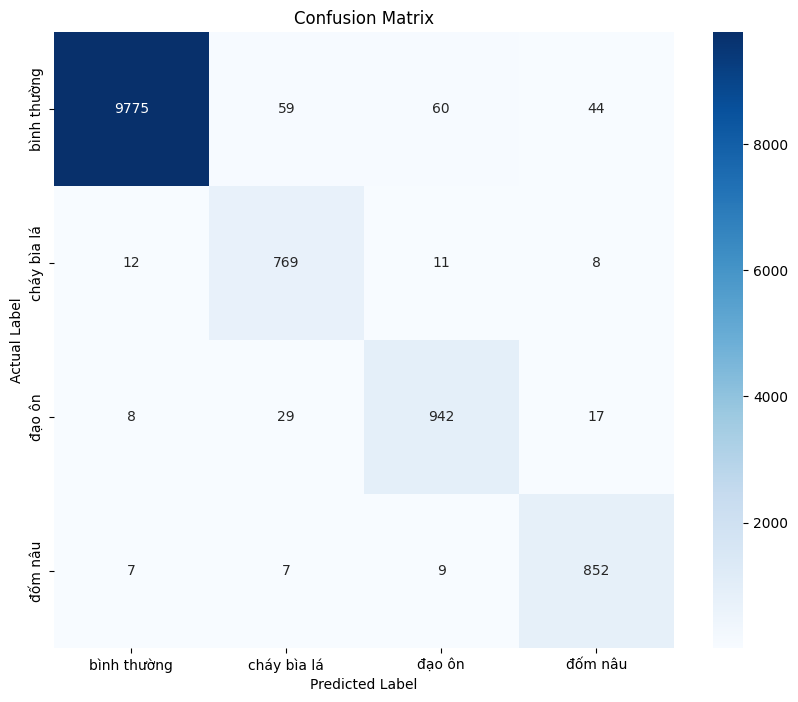

In [23]:
print("\nƒê√°nh gi√° hi·ªáu su·∫•t m√¥ h√¨nh tr√™n t·∫≠p test...")
y_pred = model.predict(X_test)

# In b√°o c√°o ph√¢n lo·∫°i (classification report)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n (confusion matrix)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
import joblib

In [25]:
feature_names = X_encoded.columns.tolist()

In [26]:
saved_objects = {
    'model': model,
    'label_encoders_X': label_encoders_X,
    'label_encoder_y': le_y,
    'feature_names': feature_names,
    'class_names': class_names.tolist()
}

In [27]:
folder_path = r'D:\ƒê·ªì √°n\model'
file_name = 'rice_disease_predictor.joblib'
full_path = os.path.join(folder_path, file_name)

In [28]:
joblib.dump(saved_objects, full_path)

['D:\\ƒê·ªì √°n\\model\\rice_disease_predictor.joblib']

In [31]:
import joblib
import pandas as pd
import numpy as np

# 1. T·∫¢I L·∫†I C√ÅC ƒê·ªêI T∆Ø·ª¢NG ƒê√É L∆ØU üìÇ
file_path = r'D:\ƒê·ªì √°n\model\rice_disease_predictor.joblib'
loaded_objects = joblib.load(file_path)

# T√°ch c√°c ƒë·ªëi t∆∞·ª£ng ra c√°c bi·∫øn ri√™ng ƒë·ªÉ d·ªÖ s·ª≠ d·ª•ng
loaded_model = loaded_objects['model']
# S·ª¨A L·ªñI KEY: Ki·ªÉm tra key ch√≠nh x√°c khi l∆∞u
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ l∆∞u label encoders cho c√°c c·ªôt X d∆∞·ªõi key 'label_encoders_X'
loaded_encoders_X = loaded_objects.get('label_encoders_X', {}) 
loaded_encoder_y = loaded_objects['label_encoder_y']
loaded_feature_names = loaded_objects['feature_names']
loaded_class_names = loaded_objects['class_names']

print("‚úÖ ƒê√£ t·∫£i l·∫°i m√¥ h√¨nh v√† c√°c ƒë·ªëi t∆∞·ª£ng th√†nh c√¥ng!")

# 2. T·∫†O M·ªòT K·ªäCH B·∫¢N R·ª¶I RO CAO (D·ªÑ B·ªä B·ªÜNH) üìù
high_risk_data_point = {
    # TƒÇNG CAO: M∆∞a l·ªõn v√† li√™n t·ª•c trong nh·ªØng ng√†y g·∫ßn ƒë√¢y
    'rain_mean_3d': 15.0,
    'rain_sum_3d': 45.0,
    'rain_mean_7d': 12.5,
    'rain_sum_7d': 87.5,
    
    # Gi·ªØ nhi·ªát ƒë·ªô ·∫•m √°p, ph√π h·ª£p cho m·∫ßm b·ªánh
    'min_mean_3d': 25.1,
    'min_mean_7d': 25.3,
    'max_mean_3d': 30.5, # Nhi·ªát ƒë·ªô ban ng√†y kh√¥ng qu√° cao do tr·ªùi nhi·ªÅu m√¢y, m∆∞a
    'max_mean_7d': 31.0,
    
    # TƒÇNG CAO: ƒê·ªô ·∫©m r·∫•t cao, ƒëi·ªÅu ki·ªán l√Ω t∆∞·ªüng cho n·∫•m b·ªánh
    'humidi_mean_3d': 92.5,
    'humidi_mean_7d': 91.0,
    
    # Gi·ªØ ·ªü m·ª©c v·ª´a ph·∫£i
    'wind_mean_3d': 1.8,
    'wind_mean_7d': 2.0,
    'cloud_mean_3d': 8.5, # Tr·ªùi nhi·ªÅu m√¢y
    'cloud_mean_7d': 8.2,
    
    # ƒê·ªô ·∫©m ƒë·∫•t cao do m∆∞a nhi·ªÅu
    'soil_moisture_mean_3d': 78.0,
    'soil_moisture_mean_7d': 75.5,
    
    # TƒÇNG CAO: D∆∞ th·ª´a ƒë·∫°m l√†m c√¢y y·∫øu, d·ªÖ nhi·ªÖm b·ªánh
    'soil_nitrogen_mean_3d': 28.5,
    'soil_nitrogen_mean_7d': 27.9,
    
    # Gi·ªØ pH ·ªïn ƒë·ªãnh
    'soil_ph_mean_3d': 5.7,
    'soil_ph_mean_7d': 5.8,
    
    # Giai ƒëo·∫°n c√¢y l√∫a m·∫´n c·∫£m
    'days_since_sowing': 65, 
    
    # TƒÇNG CAO: ƒê√£ l√¢u ch∆∞a phun thu·ªëc ph√≤ng ng·ª´a
    'days_since_treatment': 21,
    
    # C√°c feature d·∫°ng ch·ªØ (categorical)
    'province': 'An Giang',
    'crop_variety': 'ƒê√†i Th∆°m 8', # Gi·ªëng n√†y c≈©ng kh√° m·∫´n c·∫£m
    
    # THAY ƒê·ªîI: Giai ƒëo·∫°n c√¢y r·∫•t m·∫´n c·∫£m v·ªõi b·ªánh
    'growth_stage': 'L√†m ƒë√≤ng', 
}


# Chuy·ªÉn dictionary th√†nh DataFrame m·ªôt d√≤ng, ƒë·∫£m b·∫£o ƒë√∫ng th·ª© t·ª± c·ªôt
new_df = pd.DataFrame([high_risk_data_point])
# S·∫Øp x·∫øp l·∫°i c√°c c·ªôt c·ªßa new_df ƒë·ªÉ kh·ªõp ch√≠nh x√°c v·ªõi loaded_feature_names
new_df = new_df[loaded_feature_names]


print("\n--- D·ªØ li·ªáu m·ªõi (r·ªßi ro cao) c·∫ßn d·ª± ƒëo√°n ---")
print(new_df[['province', 'crop_variety', 'growth_stage', 'days_since_sowing', 'humidi_mean_7d', 'rain_sum_7d']])

# 3. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU M·ªöI ‚öôÔ∏è
processed_df = new_df.copy()
categorical_cols_to_encode = ['province', 'crop_variety', 'growth_stage']

for col in categorical_cols_to_encode:
    if col in loaded_encoders_X:
        encoder = loaded_encoders_X[col]
        # X·ª≠ l√Ω gi√° tr·ªã ch∆∞a t·ª´ng th·∫•y (unseen value) n·∫øu c√≥
        # ·ªû ƒë√¢y ta gi·∫£ ƒë·ªãnh gi√° tr·ªã nh·∫≠p v√†o lu√¥n c√≥ trong l√∫c train
        processed_df[col] = encoder.transform(processed_df[col])

print("\n--- D·ªØ li·ªáu sau khi m√£ h√≥a, s·∫µn s√†ng cho m√¥ h√¨nh ---")
print(processed_df[categorical_cols_to_encode])


# 4. TH·ª∞C HI·ªÜN D·ª∞ ƒêO√ÅN üöÄ
prediction_encoded = loaded_model.predict(processed_df)
prediction_proba = loaded_model.predict_proba(processed_df)

# 5. DI·ªÑN GI·∫¢I K·∫æT QU·∫¢
predicted_class_name = loaded_encoder_y.inverse_transform(prediction_encoded)[0]
probabilities = prediction_proba[0]

print("\n--- K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN ---")
print(f"üìà D·ª± ƒëo√°n tr·∫°ng th√°i b·ªánh trong 7 ng√†y t·ªõi l√†: '{predicted_class_name}'")

print("\nConfidence Score (X√°c su·∫•t c·ªßa t·ª´ng l·ªõp):")
# S·ª≠ d·ª•ng loaded_encoder_y.classes_ ƒë·ªÉ ƒë·∫£m b·∫£o ƒë√∫ng th·ª© t·ª±
for i, class_name in enumerate(loaded_encoder_y.classes_):
    print(f"- {class_name}: {probabilities[i]*100:.2f}%")

‚úÖ ƒê√£ t·∫£i l·∫°i m√¥ h√¨nh v√† c√°c ƒë·ªëi t∆∞·ª£ng th√†nh c√¥ng!

--- D·ªØ li·ªáu m·ªõi (r·ªßi ro cao) c·∫ßn d·ª± ƒëo√°n ---
   province crop_variety growth_stage  days_since_sowing  humidi_mean_7d  \
0  An Giang   ƒê√†i Th∆°m 8     L√†m ƒë√≤ng                 65            91.0   

   rain_sum_7d  
0         87.5  

--- D·ªØ li·ªáu sau khi m√£ h√≥a, s·∫µn s√†ng cho m√¥ h√¨nh ---
   province  crop_variety  growth_stage
0         0             6             1

--- K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN ---
üìà D·ª± ƒëo√°n tr·∫°ng th√°i b·ªánh trong 7 ng√†y t·ªõi l√†: 'ƒë·∫°o √¥n'

Confidence Score (X√°c su·∫•t c·ªßa t·ª´ng l·ªõp):
- b√¨nh th∆∞·ªùng: 0.17%
- ch√°y b√¨a l√°: 10.04%
- ƒë·∫°o √¥n: 88.83%
- ƒë·ªëm n√¢u: 0.97%
